# An Introduction to Value Function Iteration

Quentin Batista, The University of Tokyo

## Overview

1. [The Bellman Operator and the Value Function Iteration (VFI) algorithm](#The-Bellman-Operator)
2. [The approximate Bellman Operator and the Fitted Value Function Iteration (FVFI) algorithm](#The-Approximate-Bellman-Operator)
3. [Solving the cake eating problem with FVFI in Python](#Python-Implementation)
4. [The Curse of Dimensionality](#The-Curse-of-Dimensionality)
5. [Brief, high-level discussion of variants on the basic algorithm](#Variants-on-the-Basic-Algorithm)

## The Bellman Operator

We consider the following problem:

### Sequential Formulation

Let $X$ be a nonempty set.

$$\max_{\left\{ x_{t}\right\} _{t=1}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}F\left(x_{t},x_{t+1}\right)$$

subject to: 

$$x_{t+1}\in\Gamma\left(x_{t}\right)\quad\text{and}\quad x_{0}:\mathrm{given}$$

for $t=0,1,\dots$.

- $\Gamma:X\rightarrow X$: feasibility constraint
- $F:A\rightarrow\mathbb{R}$ where $A=\left\{ \left(x,y\right)\in X\times X:y\in\Gamma\left(x\right)\right\} $: one-period return function
- $\beta\in\left(0,1\right)$: discount factor



### Application to the Cake Eating Problem from the QuantEcon lecture

Consider the setup from the [Cake Eating Problem QuantEcon lecture](https://python-intro.quantecon.org/cake_eating_problem.html).


$$\max_{\left\{ c_{t}\right\} _{t=0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}u\left(c_{t}\right) \tag{1}$$

subject to:

$$
x_{t+1} = x_t - c_t
\quad \text{and} \quad
0\leq c_t\leq x_t \tag{2}
$$


for $t=0,1,\dots$.

- $x_{t}$: size of the cake at time $t$
- $c_{t}$: choice of consumption at time $t$
- Law of motion: $x_{t+1}=x_{t}-c_{t}$
- Time 0 endowment: $x_{0}=\bar{x}$
- $u\left(c\right)=\frac{c^{1-\gamma}}{1-\gamma}$: utility function
- $\beta$: discount factor
- $\Gamma\left(x\right)=\left\{ y\in X:y=x-c\:\mathrm{for}\:\mathrm{some}\:c\in\left[0,x\right]\right\} $
- $F\left(x,y\right)=u\left(x-y\right)$

### Some Helpful Assumptions

1. $X\subset\mathbb{R}^{N}$
2. $F$: continuous
3. $F$: bounded

*Note: many examples from Economics require some modifications to satisfy assumption 3.*

### Recursive Formulation

#### A crucial observation

Denote $\Pi\left(x_{0}\right)=\left\{ \left\{ x_{t}\right\} _{t=0}^{\infty}:x_{t+1}\in\Gamma\left(x_{t}\right),t=0,1,\dots\right\} $.

This is the set of feasible paths.

Let $U\left(\underline{x}\right)=\sum_{t=0}^{\infty}\beta^{t}F\left(x_{t},x_{t+1}\right)$ where $\underline{x}=\left(x_{0},x_{1},\dots\right)$ and $\underline{x}^{t}=\left(x_{t},x_{t+1},\dots\right)$.

Observe that:

$$\begin{eqnarray}
U\left(\underline{x}\right)&=&F\left(x_{0},x_{1}\right)+\sum_{t=1}^{\infty}\beta^{t}F\left(x_{t},x_{t+1}\right)\\&=&F\left(x_{0},x_{1}\right)+\beta U\left(\underline{x}^{1}\right)\\&=&F\left(x_{0},x_{1}\right)+\beta F\left(x_{0},x_{1}\right)+\beta^{2}U\left(\underline{x}^{2}\right)\\&\vdots&\\&=&\sum_{\tau=0}^{t-1}\beta^{\tau}F\left(x_{\tau},x_{\tau+1}\right)+\beta^{t}U\left(\underline{x}^{t}\right)
\end{eqnarray}$$

#### Optimal value function

Let $v^{*}:\mathbb{R}_{+}\rightarrow\mathbb{R}$ be the maximum lifetime utility attainable from the current time when $x$ units of cake are left.

($v^{*}$ is well-defined and bounded by assumption 3.)

We have: 

$$v^{*}\left(x\right)=\sup_{\underline{x}\in\Pi\left(x\right)}U\left(\underline{x}\right)$$

Using our "crucial observation":

$$v^{*}\left(x\right)=\sup_{y\in\Gamma\left(x\right)}F\left(x,y\right)+\beta v^{*}\left(y\right)$$

This equation is called the Bellman equation.

### The Bellman Operator

Let $\mathcal{B}\left(X\right)$ be the set of bounded functions from $X$ to $\mathbb{R}$ and $\mathcal{C}_{b}\left(X\right)$ the set of bounded countinuous functions from $X$ to $\mathbb{R}$.

Given $v\in\mathcal{B}\left(X\right)$, let

$$w\left(x\right)\equiv\sup_{y\in\Gamma\left(x\right)}F\left(x,y\right)+\beta v\left(y\right)$$ 

One can show that $w\in\mathcal{B}\left(X\right)$.

We can regard the right-hand side of this equation as a function of $v$. Using this observation, we can define the operator $T:\mathcal{B}\left(X\right)\rightarrow\mathcal{B}\left(X\right)$ satisfying:

$$\left(Tv\right)\left(x\right)=\sup_{y\in\Gamma\left(x\right)}F\left(x,y\right)+\beta v\left(y\right)$$

This operator is called the Bellman operator.

(If $v\in\mathcal{C}_{b}\left(X\right)$, we can replace $\sup$ with $\max$ (by the Extreme Value Theorem) and $Tv\in\mathcal{C}_{b}\left(X\right)$ (by the Theorem of Maximum).)

### Value Function Iteration Algorithm

Observe that $Tv^{*}=v^{*}$, i.e. $v^{*}$ is a fixed point of $T$ 

**Idea:** Start with some function $v$ and apply $T$ repeatedly until convergence

<img src="vfi_algo.jpeg">

where $bS=\mathcal{B}\left(X\right)$ in our notation and $d_{\infty}\left(v,w\right)=\sup_{x\in X}\left|v\left(x\right)-w\left(x\right)\right|$. 

*Source: Chapter 5 of [1]*

A stopping criterion is used to avoid iterating for an infinite amount of time.

#### How does this work?

1. Show that $T$ is a **contraction mapping** in $\left(\mathcal{B}\left(X\right),d_{\infty}\right)$, i.e. $d_{\infty}\left(Tv,Tw\right)\leq\beta d_{\infty}\left(v,w\right)$
2. Show that $\left(\mathcal{B}\left(X\right),d_{\infty}\right)$ is a complete metric space (see [here](https://en.wikipedia.org/wiki/Complete_metric_space#Some_theorems))
3. Apply [Banach's fixed point theorem](https://en.wikipedia.org/wiki/Banach_fixed-point_theorem)

Result: $T^{n}v$ converges (uniformly) to $v^{*}$ as $n\rightarrow\infty$

#### Error bound and rate of convergence

Using the fact that $T$ is a contraction mapping:

$$\begin{eqnarray}
d_{\infty}\left(T^{2}v,Tv\right)&\leq&\beta d_{\infty}\left(Tv,v\right)\\d_{\infty}\left(T^{3}v,T^{2}v\right)&\leq&\beta d_{\infty}\left(T^{2}v,Tv\right)\\&\vdots&\\d_{\infty}\left(T^{n}v,T^{n-1}v\right)&\leq&\beta d_{\infty}\left(T^{n-1}v,T^{n-2}v\right)
\end{eqnarray}$$

This gives us some information about the speed of convergence of the algorithm and helps us form expectation about what a "normal" error pattern should look like. ($\beta$ is called a Lipschitz constant for $T$)

We can also show that:

$$d_{\infty}\left(v^{*},Tv\right)\leq\frac{\beta}{1-\beta}d_{\infty}\left(Tv,v\right)$$

This gives us a bound for the approximation error arising from using a stopping criterion.

### Policy function

Assume that the agent chooses $c_{t}$ according to $c_{t}=\sigma\left(x_{t}\right)$ for some  $\sigma:\mathbb{R_{+}\rightarrow\mathbb{R}_{+}}$.

$\sigma$ is called a **policy function**. 


Let $v_{\sigma}$ be the value associated with following policy $\sigma$.

A policy is feasible if it satisfies $\sigma\left(x\right)\in\Gamma\left(x\right)$ for all $x$. Let $\Sigma$ denote the set of all feasible policies.

Observe that:

$$v^{*}\left(x\right)=\sup\left\{ v_{\sigma}\left(x\right):\sigma\in\Sigma\right\} $$

$\sigma^{*}$ is called an optimal policy function if $v_{\sigma^{*}}=v^{*}$

As we did with the Bellman operator, we can define an operator $T_{\sigma}$ satisfying

$$\left(T_{\sigma}v\right)\left(x\right)=F\left(x,\sigma\left(x\right)\right)+\beta v\left(\sigma\left(x\right)\right)$$

Iteration on $T_{\sigma}$ converges to $v_{\sigma}$. 

A policy $\sigma$ is $v$-greedy if it satisfies

$$\sigma\left(x\right)\in\arg\max_{y\in\Gamma\left(x\right)}F\left(x,y\right)+\beta v\left(y\right)$$

## The Approximate Bellman Operator

Computers generally use floating point arithmetic (i.e. use a string of 1 and 0 of fixed length, say 32 or 64, to approximate real numbers) so some degree of approximation is always necessary.  

Computers have finite amount of memory so it is in general not possible to store $v\left(x\right)$ for all $x\in\mathbb{R}_{+}$.

#### Challenge: How can we represent $v$ on a computer?

- Parametric approximation to $v$, say with a polynomial function $w\left(y\right)=\sum_{i=0}^{n-1}a_{i}y^{i}$
- Consider only a finite set of points in $\mathbb{R_{+}}$

This generates additional **approximation** error

### Fitted Value Function Iteration

Let $\hat{T}$ be an approximate Bellman operator. 

We have the following decomposition: $\hat{T}=L\circ T$, i.e. $\hat{T}v=LTv$.

- $T$ is the Bellman operator.
- $L$ is an approximation operator

**Idea:** Iterate on the approximate Bellman operator until convergence.

<img src="fvfi_algo.jpeg">

*Source: Chapter 6 of [1]*

#### Fitted Value Function Iteration + Piecewise Constant Linear Interpolation + Grid

In this lecture, we'll mostly focus on the following scheme: 

- Equally spaced grid of points 
- Piecewise linear interpolation 
- Constant extrapolation

<img src="illustration_basic_scheme.jpeg" width='600'>

**FVFI specialized to the Cake Eating Problem:**

<img src="specialized_fvfi.png">


#### How do we know that value iteration will still work when there is approximation error?

If $L$ is **nonexpansive** on $\left(\mathcal{C}_{b}\left(X\right),d_{\infty}\right)$, $\hat{T}$ is a uniform contraction on $\left(\mathcal{C}_{b}\left(X\right),d_{\infty}\right)$ and the previous argument applies. (See [6])

$L$ is **nonexpansive** on $\left(S,d\right)$ if 

$$d\left(Lv,Lw\right)\leq d\left(v,w\right)$$ 

for all $v,w\in S$. 

The approximation scheme described above is nonexpansive.



## Some Comments on FVFI

#### Advantages

- Extremely versatile
- Theoretical properties
- Global solution

#### Disadvantages

- Slow (compared to say perturbation methods)
- Often suffers from the Curse of Dimensionality
- Interaction between different approximation at different levels can sometimes cause instability

## Python Implementation

### Some comments on programming language

Many people have strong opinions about which language is better.

**Advantages of Matlab:**
- Currently mainstream in Economics (legacy code is often in Matlab)

**Disadvantages of Matlab:**
- Closed-source
- Often slow
- Design

**Advantages of Python:**
- Well-developed ecosystem
- Extremely versatile
- Object-orientated language

**Disadvantages of Python:**
- Getting different tools to work together can be difficult

**Advantages of Julia:**
- Built for scientific computation
- Dynare developers are working on a Julia version

**Disadvantages of Julia:**
- Changing very quickly


Some people argue that Python is too slow for computational Economics (e.g. [Aruoba and Fernandez-Villaverde](https://github.com/jstac/julia_python_comparison/blob/master/Update_March_23_2018.pdf))

Answer: [No, Python is Not Too Slow for Computational Economics](https://notes.quantecon.org/submission/5bae5cb538674f000fd2c8e3) by John Stachurski

### Python tools for scientific computation

- [NumPy](https://numpy.org/devdocs/reference/index.html): Data structure + some linear algebra
- [SciPy](https://docs.scipy.org/doc/scipy/reference/): Scientific computation from solving optimization problem, linear algebra, interpolation, solving differential equations, etc...
- [Pandas](https://pandas.pydata.org/): Data structure + tools for data analysis
- [Matplotlib](https://matplotlib.org/): Plotting library
- [SymPy](https://www.sympy.org/en/index.html): Symbolic computation
- [Numba](http://numba.pydata.org/): Makes your code fast
- [Interpolation](https://github.com/EconForge/interpolation.py): Fast interpolation 
- [JAX](https://github.com/google/jax): Automatic differentiation + code optimization

### Some Python tools for economic modelling

- [`QuantEcon.py`](https://quanteconpy.readthedocs.io/en/latest/): Tools to write your own code (e.g. discretization of AR(1) process, LQ control problems, some optimizers, etc...).
- [Dolo](https://dolo.readthedocs.io/en/latest/): More or less equivalent to `Dynare`.
- [Econ-ARK](https://econ-ark.org/): Toolkit for heterogenuous agents structural modeling.

In [1]:
!pip install interpolation

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from interpolation import interp
from scipy.optimize import minimize_scalar


%config InlineBackend.figure_format = 'retina'

In [3]:
# "Mathematics is the art of giving the same thing different names" (Henri Poincaré)

class CakeEating:
    def __init__(self,
                 β=0.96,           # discount factor
                 γ=1.5,            # degree of relative risk aversion
                 x_grid_min=1e-3,  # exclude zero for numerical stability
                 x_grid_max=2.5,   # size of cake
                 x_grid_size=120):

        self.β, self.γ = β, γ

        # Set up grid
        self.x_grid = np.linspace(x_grid_min, x_grid_max, x_grid_size)

    # Utility function
    def u(self, c):

        γ = self.γ

        if γ == 1:
            return np.log(c)
        else:
            return (c ** (1 - γ)) / (1 - γ)

    # first derivative of utility function
    def u_prime(self, c):

        return c ** (-self.γ)

    def state_action_value(self, c, x, v_array):
        """
        Right hand side of the Bellman equation given x and c.
        
        """

        u, β = self.u, self.β
        v = lambda x: interp(self.x_grid, v_array, x)

        return u(c) + β * v(x - c)
    

# Define a function to solve the maximization problem
def maximize(g, a, b, args):
    """
    Maximize the function g over the interval [a, b].

    We use the fact that the maximizer of g on any interval is
    also the minimizer of -g.  The tuple args collects any extra
    arguments to g.

    Returns the maximal value and the maximizer.
    """

    objective = lambda x: -g(x, *args)
    result = minimize_scalar(objective, bounds=(a, b), method='bounded')
    maximizer, maximum = result.x, -result.fun
    return maximizer, maximum


def T(v, ce):
    """
    The Bellman operator.  Updates the guess of the value function.

    * ce is an instance of CakeEating
    * v is an array representing a guess of the value function

    """
    v_new = np.empty_like(v)

    for i, x in enumerate(ce.x_grid):
        # Maximize RHS of Bellman equation at state x
        v_new[i] = maximize(ce.state_action_value, 1e-10, x, (x, v))[1]  # v_new[i] = v'(x_i)

    return v_new

In [4]:
# Create an instance of the `CakeEating` class
# ce.β
ce = CakeEating()

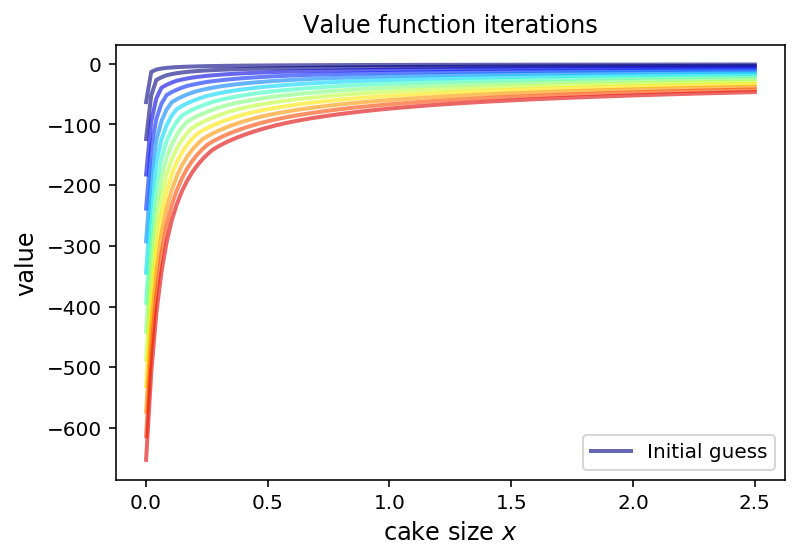

In [5]:
# This cell creates a plot showing how the value function changes at each iteration
x_grid = ce.x_grid
v = ce.u(x_grid)       # Initial guess
n = 12                 # Number of iterations

fig, ax = plt.subplots()

ax.plot(x_grid, v, color=plt.cm.jet(0),
        lw=2, alpha=0.6, label='Initial guess')

for i in range(n):
    v = T(v, ce)  # Apply the Bellman operator
    ax.plot(x_grid, v, color=plt.cm.jet(i / n), lw=2, alpha=0.6)

ax.legend()
ax.set_ylabel('value', fontsize=12)
ax.set_xlabel('cake size $x$', fontsize=12)
ax.set_title('Value function iterations')

plt.show()

In [6]:
def compute_value_function(ce,
                           tol=1e-4,
                           max_iter=1000,
                           verbose=True,
                           print_skip=25):

    # Set up loop
    v = np.zeros(len(ce.x_grid)) # Initial guess
    i = 0
    error = tol + 1

    while i < max_iter and error > tol:  # `max_iter` is used to ensure termination of algorithm
        v_new = T(v, ce)

        error = np.max(np.abs(v - v_new))
        i += 1

        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")

        v = v_new

    if i == max_iter:
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")

    return v_new

In [7]:
%%time

v = compute_value_function(ce)

Error at iteration 25 is 23.8003755134813.
Error at iteration 50 is 8.577577195046615.
Error at iteration 75 is 3.091330659691039.
Error at iteration 100 is 1.1141054204751981.
Error at iteration 125 is 0.4015199357729671.
Error at iteration 150 is 0.14470646660561215.
Error at iteration 175 is 0.052151735472762084.
Error at iteration 200 is 0.018795314242879613.
Error at iteration 225 is 0.006773769545588948.
Error at iteration 250 is 0.0024412443051460286.
Error at iteration 275 is 0.000879816432870939.
Error at iteration 300 is 0.00031708295398402697.
Error at iteration 325 is 0.00011427565573285392.

Converged in 329 iterations.
CPU times: user 18.5 s, sys: 677 ms, total: 19.2 s
Wall time: 18.7 s


In [8]:
# Compute analytical solution at grid points
def v_star(x, β, γ):
    return (1 - β**(1 / γ))** (-γ) * (x ** (1-γ) / (1-γ))


v_analytical = v_star(ce.x_grid, ce.β, ce.γ)

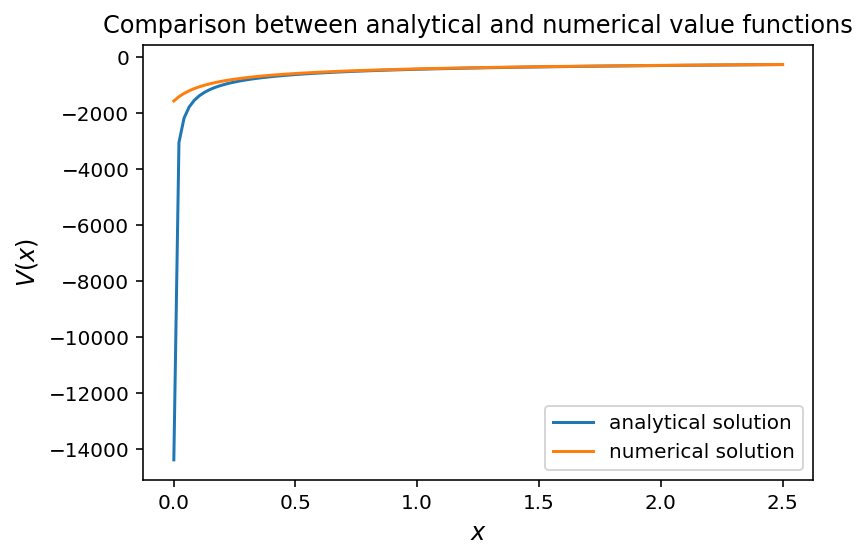

In [9]:
# This cell creates a plot that compares the numerical and analytical solutions
fig, ax = plt.subplots()

ax.plot(x_grid, v_analytical, label='analytical solution')
ax.plot(x_grid, v, label='numerical solution')
ax.set_ylabel('$V(x)$', fontsize=12)
ax.set_xlabel('$x$', fontsize=12)
ax.legend()
ax.set_title('Comparison between analytical and numerical value functions')
plt.show()

In [10]:
def σ(ce, v):
    """
    The optimal policy function. Given the value function,
    it finds optimal consumption in each state.

    * ce is an instance of CakeEating
    * v is a value function array

    """
    c = np.empty_like(v)

    for i in range(len(ce.x_grid)):
        x = ce.x_grid[i]
        # Maximize RHS of Bellman equation at state x
        c[i] = maximize(ce.state_action_value, 1e-10, x, (x, v))[0]

    return c


c = σ(ce, v)

In [11]:
def c_star(x, β, γ):

    return (1 - β ** (1/γ)) * x


c_analytical = c_star(ce.x_grid, ce.β, ce.γ)

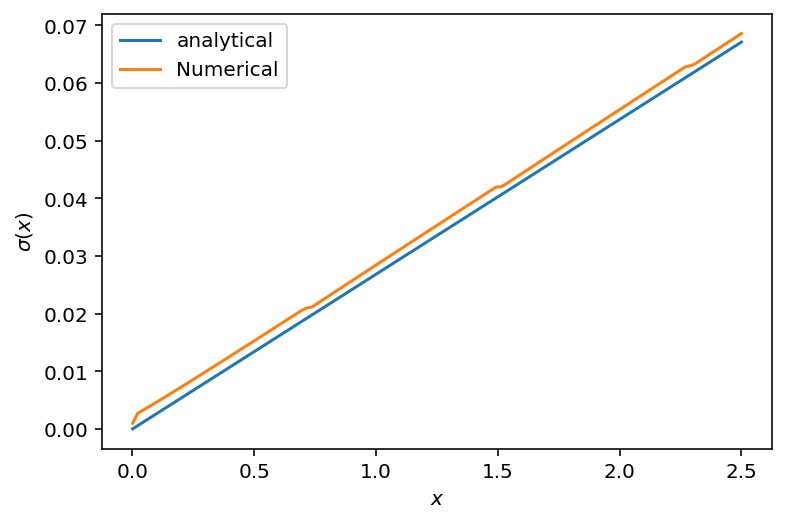

In [12]:
fig, ax = plt.subplots()

ax.plot(ce.x_grid, c_analytical, label='analytical')
ax.plot(ce.x_grid, c, label='Numerical')
ax.set_ylabel(r'$\sigma(x)$')
ax.set_xlabel('$x$')
ax.legend()

plt.show()

In [13]:
# x'
ce.x_grid[0] - c[0]

4.79726989758753e-06

In [14]:
# v(x) 
v[0]

-1584.9427757945296

In [15]:
# v(x')
interp(ce.x_grid, v, ce.x_grid[0] - c[0])

-1584.9427757945296

## The Curse of Dimensionality

We ask the following question: how does the number of points in our grid change when we increase the number of dimensions of the state vector?

In [16]:
dims_nb = 12
d = np.arange(1, dims_nb)
points_per_d = 10
grid_points = points_per_d ** d

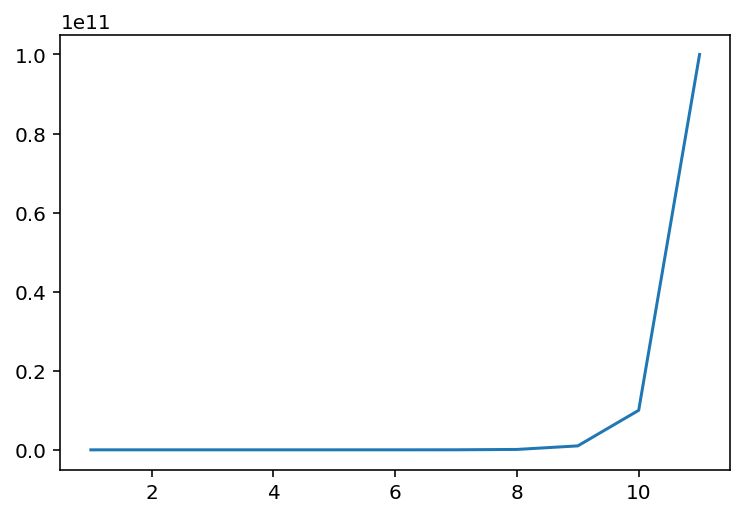

In [17]:
plt.plot(d, grid_points);
# 1e11 = one hundred billion

**Both memory requirements and the amount of computation explode exponentially as the number of dimensions grow!**

Many economic models feature high-dimensional state spaces:
- International Real Business Cycle models
- Dynamic Stochastic General Equilibrium (DSGE) models
- Overlapping Generations (OLG) models
- Mathematical finance

### CPU-bound

"In computer science, a computer is CPU-bound (or compute-bound) when the time for it to complete a task is determined principally by the speed of the central processor: processor utilization is high, perhaps at 100% usage for many seconds or minutes. " (Wikipedia)

### Memory-bound

"Memory bound refers to a situation in which the time to complete a given computational problem is decided primarily by the amount of memory required to hold data." (Wikipedia)

In [18]:
dims_nb = 20

try:
    np.ones((points_per_d, ) * dims_nb)
except ValueError as e: 
    print('Error message:', e)

Error message: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.


## Variants on the Basic Algorithm

### Different Numerical Grids

**Basic idea**: Choose points in a more thoughtful manner

- `np.geomspace` vs. `np.linspace`


In [19]:
geom_grid = np.geomspace(ce.x_grid.min(), ce.x_grid.max(), num=ce.x_grid.size)

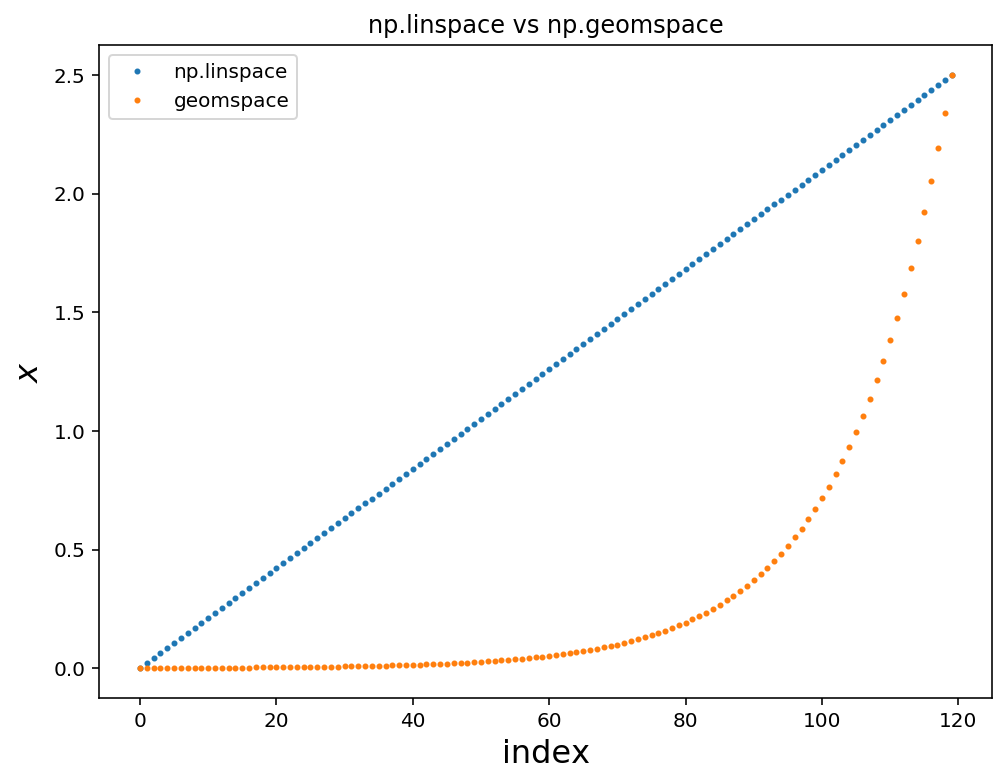

In [20]:
plt.figure(figsize=(8, 6))
idx = np.arange(0, ce.x_grid.size)
plt.plot(idx, ce.x_grid, 'o', markersize=2., label='np.linspace')
plt.plot(idx, geom_grid, 'o', markersize=2., label='geomspace')
plt.xlabel('index', size=16)
plt.ylabel(r'$x$', size=16)
plt.legend()
plt.title('np.linspace vs np.geomspace');

In [21]:
ce_geom = CakeEating()
ce_geom.x_grid = geom_grid  # Modifies the 

In [22]:
v_geom = compute_value_function(ce_geom)

Error at iteration 25 is 23.800375513484482.
Error at iteration 50 is 8.577577195049116.
Error at iteration 75 is 3.0913306596955863.
Error at iteration 100 is 1.114105420476335.
Error at iteration 125 is 0.40151993577751455.
Error at iteration 150 is 0.1447064666076585.
Error at iteration 175 is 0.052151735474126326.
Error at iteration 200 is 0.018795314247881834.
Error at iteration 225 is 0.006773769557412379.
Error at iteration 250 is 0.002441244310602997.
Error at iteration 275 is 0.0008798164353720495.
Error at iteration 300 is 0.0003170829568261979.
Error at iteration 325 is 0.0001142756586887117.

Converged in 329 iterations.


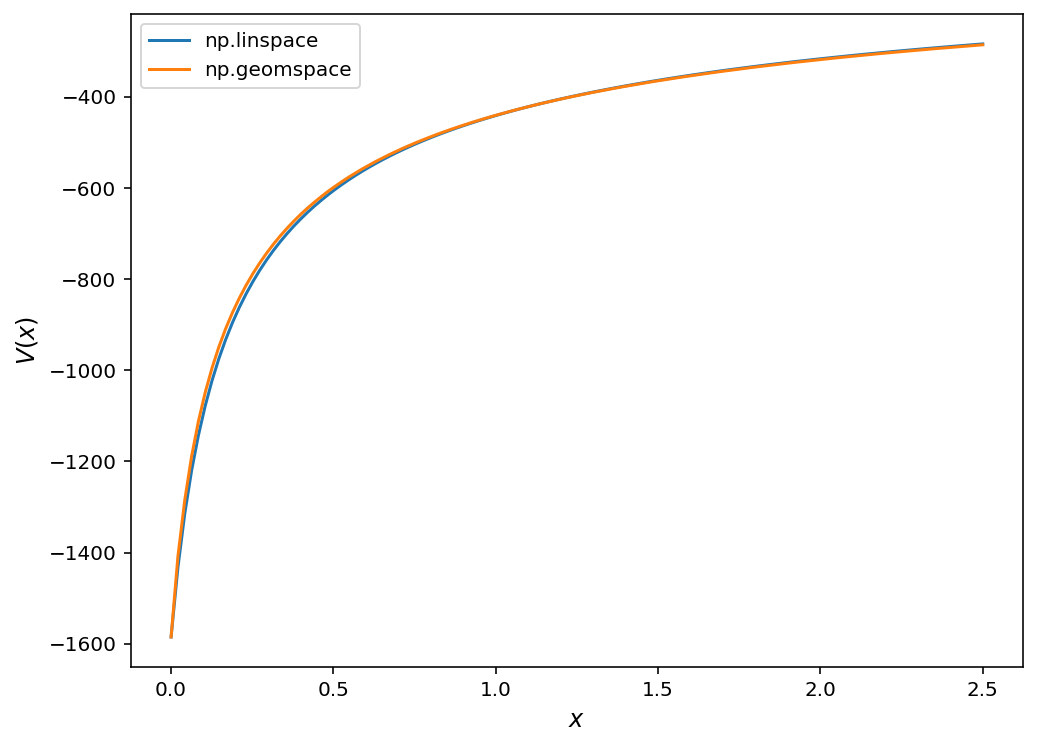

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x_grid, v, label='np.linspace')
ax.plot(x_grid, interp(geom_grid, v_geom, x_grid), label='np.geomspace')
ax.set_ylabel('$V(x)$', fontsize=12)
ax.set_xlabel('$x$', fontsize=12)
ax.legend()
plt.show()

- Fancy: [Adaptive sparse grids](http://johannesbrumm.com/wp-content/uploads/2017/09/Brumm-Scheidegger-2017-ECTA.pdf)

<img src="full_vs_sparse_grid.png" width="400">

<img src="adaptive_sparse_test.png"  width="1000">

*Source: [2]*

**Important note:** There are grid-free methods for doing numerical DP


### Different Approximation Methods

Packages in Python: [interpolation.py](https://github.com/EconForge/interpolation.py), [SciPy](https://docs.scipy.org/doc/scipy/reference/interpolate.html)

- Piecewise linear
- Various types of polynomials ([Chebychev](https://en.wikipedia.org/wiki/Chebyshev_polynomials), [Hermite](https://en.wikipedia.org/wiki/Hermite_polynomials))
- [Splines](https://en.wikipedia.org/wiki/Spline_(mathematics))
- Neural Networks (tools: [TensorFlow](https://github.com/tensorflow/tensorflow), [PyTorch](https://github.com/pytorch/pytorch), [Keras](https://keras.io/))

If you **really** love neural networks: [DeepEquilibriumNets](https://github.com/sischei/DeepEquilibriumNets)

On Neural Networks: 
- Very popular recently

#### Things to take into consideration:

- Nonexpansive approximation
- Shape preservation [(Judd and Cai, 2013)](https://ideas.repec.org/a/spr/mathme/v77y2013i3p407-421.html)

### Example

Consider the following functional form: $w_{i}\left(y\right)\equiv w\left(y;a_{i},b_{i}\right)=a_{i}y^{b_{i}}$.

(Recall the analytical solution is $v^{*}\left(x\right)=\left(1-\beta^{\frac{1}{\gamma}}\right)^{-\gamma}\frac{x^{1-\gamma}}{1-\gamma}$) 

#### Procedure

Start with $a_{0}$ and $b_{0}$. 

Compute $\hat{T}v_{i+1}\left(x\right)=\max_{c\in\Gamma\left(x\right)}\left\{ u\left(c\right)+\beta w_{i}\left(x-c\right)\right\} $ for all $x$.

Compute $w_{i+1}$ by solving $\min_{\left(a_{i+1},b_{i+1}\right)}N^{-1}\sum_{j=1}^{N}\left(w\left(x_{j};a_{i+1},b_{i+1}\right)-\hat{T}v_{i+1}\left(x_{j}\right)\right)^{2}$.  (We'll use `scipy.optimize.curve_fit` in Python)

Iterate until convergence.


In [24]:
from scipy.optimize import curve_fit


def w(y, a, b):  # New function
    return a * y ** b


def T(v, ce, a, b):  # Changed here
    """
    The Bellman operator.  Updates the guess of the value function.

    * ce is an instance of CakeEating
    * v is an array representing a guess of the value function

    """
    v_new = np.empty_like(v)

    for i, x in enumerate(ce.x_grid):
        # Maximize RHS of Bellman equation at state x
        objective = lambda c, a, b: ce.u(c) + ce.β * w(x - c, a, b)  # Changed here
        v_new[i] = maximize(objective, 1e-10, x, (a, b))[1]
        
    a_new, b_new = curve_fit(w, x_grid, v_new)[0]  # Changed here

    return v_new, a_new, b_new  # Changed here

In [25]:
def compute_value_function(ce,
                           tol=1e-4,
                           max_iter=1000,
                           verbose=True,
                           print_skip=25):

    # Set up loop
    v = np.zeros(len(ce.x_grid)) # Initial guess
    i = 0
    error = tol + 1
    a, b = 1, 1.  # New variables

    while i < max_iter and error > tol:
        v_new, a, b = T(v, ce, a, b)  # Changed here

        error = np.max(np.abs(v - v_new))
        i += 1

        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")

        v = v_new

    if i == max_iter:
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")

    return v_new, a, b  # Changed here

In [26]:
v_param, a, b = compute_value_function(ce)

Error at iteration 25 is 210.22926495037518.
Error at iteration 50 is 131.42845469426902.
Error at iteration 75 is 71.77123767689773.
Error at iteration 100 is 37.97945776204142.
Error at iteration 125 is 19.377959200675832.
Error at iteration 150 is 9.811048035538988.
Error at iteration 175 is 4.941118951195676.
Error at iteration 200 is 2.4887378760249703.
Error at iteration 225 is 1.2523029396888887.
Error at iteration 250 is 0.6297083963218029.
Error at iteration 275 is 0.31646482151700184.
Error at iteration 300 is 0.15896189673730987.
Error at iteration 325 is 0.07980932932878204.
Error at iteration 350 is 0.040050838730167015.
Error at iteration 375 is 0.02008942872089392.
Error at iteration 400 is 0.010072107481391868.
Error at iteration 425 is 0.0050473986430006335.
Error at iteration 450 is 0.002528170627556392.
Error at iteration 475 is 0.0012657071511057438.
Error at iteration 500 is 0.0006333508245006669.
Error at iteration 525 is 0.00031676380058343057.
Error at iteration

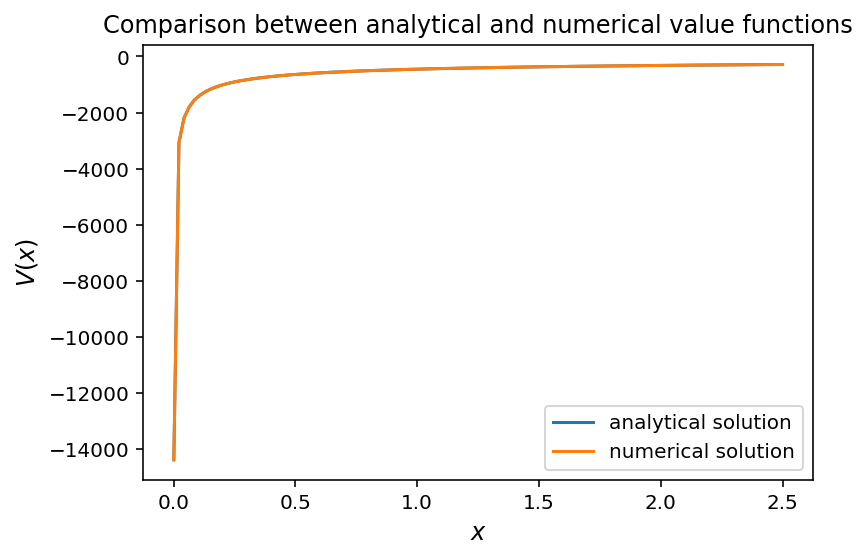

In [27]:
fig, ax = plt.subplots()

ax.plot(x_grid, v_analytical, label='analytical solution')
ax.plot(x_grid, v_param, label='numerical solution')
ax.set_ylabel('$V(x)$', fontsize=12)
ax.set_xlabel('$x$', fontsize=12)
ax.legend()
ax.set_title('Comparison between analytical and numerical value functions')
plt.show()

### Different Maximization Routines

- [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)
- [quantecon.optimize](https://quanteconpy.readthedocs.io/en/latest/optimize.html)

In [28]:
from scipy.optimize import minimize


# Define a function to solve the maximization problem
def maximize(g, x0, args):  # Changed here
    """
    Maximize the function g over the interval [a, b].

    We use the fact that the maximizer of g on any interval is
    also the minimizer of -g.  The tuple args collects any extra
    arguments to g.

    Returns the maximal value and the maximizer.
    """

    objective = lambda x: -g(x, *args)
    # Previously: result = minimize_scalar(objective, bounds=(a, b), method='bounded')
    result = minimize(objective, x0, bounds=[[1e-10, args[0]]], method='L-BFGS-B')  # Changed here
    maximizer, maximum = result.x, -result.fun
    return maximizer, maximum


def T(v, ce):
    """
    The Bellman operator.  Updates the guess of the value function.

    * ce is an instance of CakeEating
    * v is an array representing a guess of the value function

    """
    v_new = np.empty_like(v)

    for i, x in enumerate(ce.x_grid):
        # Maximize RHS of Bellman equation at state x
        x0 = x / 10
        v_new[i] = maximize(ce.state_action_value, x0, (x, v))[1]  # Changed here

    return v_new


def compute_value_function(ce,
                           tol=1e-4,
                           max_iter=1000,
                           verbose=True,
                           print_skip=25):

    # Set up loop
    v = np.zeros(len(ce.x_grid)) # Initial guess
    i = 0
    error = tol + 1

    while i < max_iter and error > tol:
        v_new = T(v, ce)

        error = np.max(np.abs(v - v_new))
        i += 1

        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")

        v = v_new

    if i == max_iter:
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")

    return v_new

In [29]:
%%time

v_diff_optimizer = compute_value_function(ce)

Error at iteration 25 is 23.743218469127896.
Error at iteration 50 is 8.55697798391634.
Error at iteration 75 is 3.0839067716296995.
Error at iteration 100 is 1.1114298755915115.
Error at iteration 125 is 0.40055567818103555.
Error at iteration 150 is 0.1443589513353345.
Error at iteration 175 is 0.05202649211037169.
Error at iteration 200 is 0.018750176946468855.
Error at iteration 225 is 0.006757502341315558.
Error at iteration 250 is 0.0024353817610744954.
Error at iteration 275 is 0.0008777036055676035.
Error at iteration 300 is 0.0003163215781114559.
Error at iteration 325 is 0.00011400137395867205.

Converged in 329 iterations.
CPU times: user 19.7 s, sys: 200 ms, total: 19.9 s
Wall time: 19.8 s


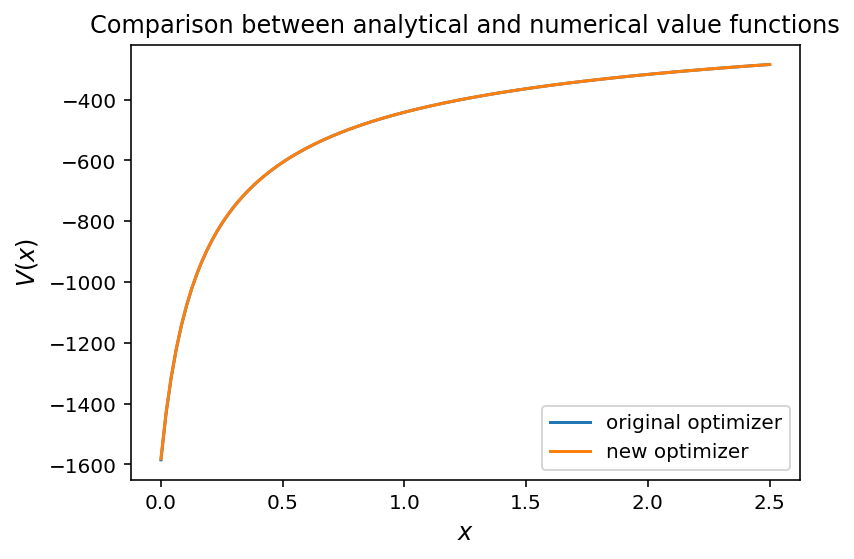

In [30]:
fig, ax = plt.subplots()

ax.plot(x_grid, v, label='original optimizer')
ax.plot(x_grid, v_diff_optimizer, label='new optimizer')
#ax.plot(x_grid, v_analytical, label='analytical')
ax.set_ylabel('$V(x)$', fontsize=12)
ax.set_xlabel('$x$', fontsize=12)
ax.legend()
ax.set_title('Comparison between analytical and numerical value functions')
plt.show()

### Reinforcement Learning


"The approximate $|S|$ of
chess, shogi, and Go are $10^{47}$, $10^{71}$, and $10^{171}$, respectively, which are comparable to the
number of atoms in the observable universe ($10^{78}$ ∼ $10^{82}$) and certainly larger than the total
information-storage capacity of humanity (in the order of $10^{20}$ bytes)." (Igami, 2018)


<img src="fig_8_sutton_barto.png">

*Source: [4]*

#### Exhaustive Search Direction

Expand the Bellman equation:

$$\begin{eqnarray}
v\left(x\right)&=&\max_{c\in\Gamma\left(x\right)}\left\{ u\left(c\right)+\beta v\left(x-c\right)\right\} \\&=&\max_{c_{1}\in\Gamma\left(x\right)}\left\{ u\left(c_{1}\right)+\beta\max_{c_{2}\in\Gamma\left(x\right)}\left\{ u\left(c_{2}\right)+\beta v\left(x-c_{1}-c_{2}\right)\right\} \right\} \\&=&\max_{c_{1}\in\Gamma\left(x\right)}\left\{ u\left(c_{1}\right)+\beta\max_{c_{2}\in\Gamma\left(x\right)}\left\{ u\left(c_{2}\right)+\beta\max_{c_{3}\in\Gamma\left(x\right)}\left\{ u\left(c_{3}\right)+\beta v\left(x-c_{1}-c_{2}-c_{3}\right)\right\} \right\} \right\} 
\end{eqnarray}$$

You can repeat this as many times as you want.

Let $T'v\left(x\right)=\max_{c_{1}\in\Gamma\left(x\right)}\left\{ u\left(c_{1}\right)+\beta\max_{c_{2}\in\Gamma\left(x\right)}\left\{ u\left(c_{2}\right)+\beta\max_{c_{3}\in\Gamma\left(x\right)}\left\{ u\left(c_{3}\right)+\beta v\left(x-c_{1}-c_{2}-c_{3}\right)\right\} \right\} \right\} $.

In [31]:
class CakeEating:
    def __init__(self,
                 β=0.96,           # discount factor
                 γ=1.5,            # degree of relative risk aversion
                 x_grid_min=1e-3,  # exclude zero for numerical stability
                 x_grid_max=2.5,   # size of cake
                 x_grid_size=120):

        self.β, self.γ = β, γ

        # Set up grid
        self.x_grid = np.linspace(x_grid_min, x_grid_max, x_grid_size)

    # Utility function
    def u(self, c):

        γ = self.γ

        if γ == 1:
            return np.log(c)
        else:
            return (c ** (1 - γ)) / (1 - γ)

    # first derivative of utility function
    def u_prime(self, c):

        return c ** (-self.γ)

    def state_action_value(self, c, x, v_array):
        """
        Right hand side of the Bellman equation given x and c.
        
        """

        u, β = self.u, self.β
        v = lambda x: interp(self.x_grid, v_array, x)

        return u(c[0]) + β * u(c[1]) + β ** 2 * v(x - c[0] - c[1])



# Define a function to solve the maximization problem
def maximize(g, x0, args):  # Changed here
    """
    Maximize the function g over the interval [a, b].

    We use the fact that the maximizer of g on any interval is
    also the minimizer of -g.  The tuple args collects any extra
    arguments to g.

    Returns the maximal value and the maximizer.
    """

    objective = lambda x: -g(x, *args)
    # Previously: result = minimize_scalar(objective, bounds=(a, b), method='bounded')
    result = minimize(objective, x0, bounds=[[1e-10, args[0]], [1e-10, args[0]]], method='L-BFGS-B')  # Changed here
    maximizer, maximum = result.x, -result.fun
    return maximizer, maximum


def T(v, ce):
    """
    The Bellman operator.  Updates the guess of the value function.

    * ce is an instance of CakeEating
    * v is an array representing a guess of the value function

    """
    v_new = np.empty_like(v)

    for i, x in enumerate(ce.x_grid):
        # Maximize RHS of Bellman equation at state x
        x0 = np.array([x / 10, x/10])
        v_new[i] = maximize(ce.state_action_value, x0, (x, v))[1]  # Changed here

    return v_new


def compute_value_function(ce,
                           tol=1e-4,
                           max_iter=1000,
                           verbose=True,
                           print_skip=25):

    # Set up loop
    v = np.zeros(len(ce.x_grid)) # Initial guess
    i = 0
    error = tol + 1

    while i < max_iter and error > tol:
        v_new = T(v, ce)

        error = np.max(np.abs(v - v_new))
        i += 1

        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")

        v = v_new

    if i == max_iter:
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")

    return v_new

In [32]:
%%time

ce = CakeEating()
v_new = compute_value_function(ce)

Error at iteration 25 is 17.470496717162632.
Error at iteration 50 is 2.2691693293329536.
Error at iteration 75 is 0.2947328589762037.
Error at iteration 100 is 0.03828162593936213.
Error at iteration 125 is 0.0049723227688218685.
Error at iteration 150 is 0.0006459084794414593.

Converged in 173 iterations.
CPU times: user 9.08 s, sys: 56.3 ms, total: 9.14 s
Wall time: 9.15 s


**Trade-off:** Each iteration is "closer to reality" but more expensive to compute

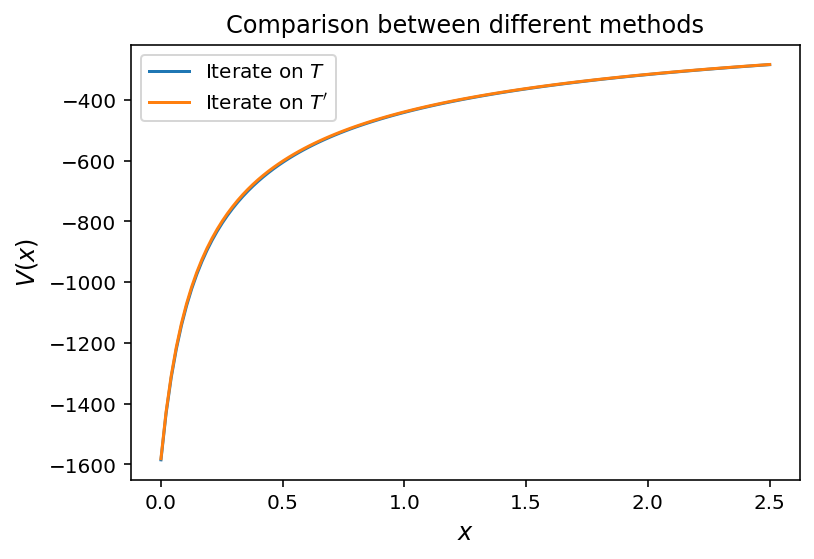

In [33]:
fig, ax = plt.subplots()

ax.plot(x_grid, v, label='Iterate on $T$')
ax.plot(x_grid, v_new, label=r"Iterate on $T'$")
ax.set_ylabel('$V(x)$', fontsize=12)
ax.set_xlabel('$x$', fontsize=12)
ax.legend()
ax.set_title('Comparison between different methods')
plt.show()

## Parallel Computing and High Performance Computing

**Basic idea:** Use multiple "computers" at the same time

First, stack the objects that need to be computed at a given iteration:

$$\begin{eqnarray}
Tv_{i+1}\left(x_{1}\right)&=&\max_{c\in\Gamma\left(x\right)}\left\{ u\left(c\right)+\beta v_{i}\left(x_{1}-c\right)\right\} \\Tv_{i+1}\left(x_{2}\right)&=&\max_{c\in\Gamma\left(x\right)}\left\{ u\left(c\right)+\beta v_{i}\left(x_{2}-c\right)\right\} \\\vdots&\vdots&\vdots\\Tv_{i+1}\left(x_{N}\right)&=&\max_{c\in\Gamma\left(x\right)}\left\{ u\left(c\right)+\beta v_{i}\left(x_{N}-c\right)\right\} 
\end{eqnarray}$$

$Tv_{i+1}\left(x_{1}\right)$ and $Tv_{i+1}\left(x_{1}\right) $ can be computed **independently** so why not do them in parallel?

#### Is this hard?

It depends.

In [34]:
from quantecon.optimize import scalar_maximization
from numba import njit, prange


# Rewrote the code to work with Numba
def bellman_operator_factory(x_grid, γ, β):
    if γ == 1:
        @njit
        def u(c):
            return np.log(c)    
    else:
        @njit
        def u(c):
            return (c ** (1 - γ)) / (1 - γ)
    
    @njit
    def state_action_value(c, x, v_array):
        """
        Right hand side of the Bellman equation given x and c.
        """
        return u(c) + β * interp(x_grid, v_array, x - c)
    
    
    @njit(parallel=True)  # Equivalent to T = njit(T, parallel=True)
    def T(v):
        """
        The Bellman operator.  Updates the guess of the value function.

        * ce is an instance of CakeEating
        * v is an array representing a guess of the value function

        """
        v_new = np.empty_like(v)

        for i in prange(len(x_grid)):
            # Maximize RHS of Bellman equation at state x
            v_new[i] = scalar_maximization.brent_max(state_action_value, 1e-10, x_grid[i], (x_grid[i], v))[1]

        return v_new
    
    return T


T = bellman_operator_factory(ce.x_grid, ce.γ, ce.β)

In [35]:
def compute_value_function(ce,
                           tol=1e-4,
                           max_iter=1000,
                           verbose=True,
                           print_skip=25):

    # Set up loop
    v = np.zeros(len(ce.x_grid)) # Initial guess
    i = 0
    error = tol + 1
    T = bellman_operator_factory(ce.x_grid, ce.γ, ce.β)

    while i < max_iter and error > tol:
        v_new = T(v)

        error = np.max(np.abs(v - v_new))
        i += 1

        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")

        v = v_new

    if i == max_iter:
        print("Failed to converge!")

    if verbose and i < max_iter:
        print(f"\nConverged in {i} iterations.")

    return v_new

In [40]:
%%time

ce = CakeEating(x_grid_size=100_000)
v_parallel = compute_value_function(ce)

Error at iteration 25 is 23.800379556253915.
Error at iteration 50 is 8.577581070744372.
Error at iteration 75 is 3.091331291948677.
Error at iteration 100 is 1.1141055552334365.
Error at iteration 125 is 0.4015200051837837.
Error at iteration 150 is 0.14470661177051625.
Error at iteration 175 is 0.052151880639712545.
Error at iteration 200 is 0.018799357015041096.
Error at iteration 225 is 0.006773904270744424.
Error at iteration 250 is 0.0024413894718691154.
Error at iteration 275 is 0.0008799345720262863.
Error at iteration 300 is 0.0003172169565459626.
Error at iteration 325 is 0.00011665660940707312.

Converged in 329 iterations.
CPU times: user 1min 9s, sys: 519 ms, total: 1min 9s
Wall time: 21 s


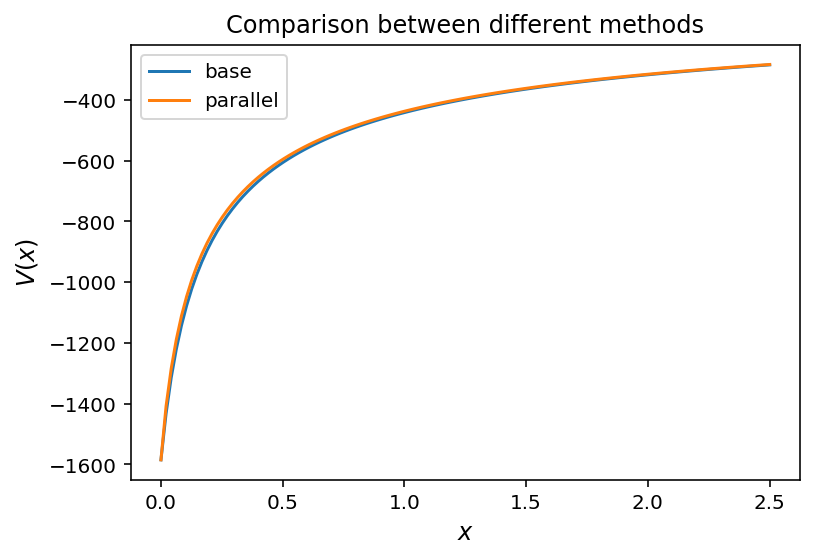

In [39]:
fig, ax = plt.subplots()

ax.plot(x_grid, v, label='base')
ax.plot(x_grid, interp(ce.x_grid, v_parallel, x_grid), label=r"parallel")
ax.set_ylabel('$V(x)$', fontsize=12)
ax.set_xlabel('$x$', fontsize=12)
ax.legend()
ax.set_title('Comparison between different methods')
plt.show()

**More about parallel computing and HPC**

- [Simon Scheidegger](https://sites.google.com/site/simonscheidegger/home)
- https://github.com/sischei/OSE2019

## References

[1] John Stachurski, 2009. "Economic Dynamics: Theory and Computation," MIT Press Books  
[2] Johannes Brumm & Simon Scheidegger, 2017. "Using Adaptive Sparse Grids to Solve High‐Dimensional Dynamic Models," Econometrica  
[3] Artificial Intelligence as Structural Estimation: Economic Interpretations of Deep Blue, Bonanza, and AlphaGo, Mitsuru Igami  
[4] Richard S. Sutton and Andrew G. Barto. 2018. Reinforcement Learning: An Introduction. A Bradford Book, Cambridge, MA, USA.  
[5] [Daisuke Oyama's](http://www.oyama.e.u-tokyo.ac.jp/) excellent lecture notes on Dynamic Programming  
[6] John Stachurski, 2008. "Continuous State Dynamic Programming via Nonexpansive Approximation," Computational Economics